# Confusion Matrices (GFS, HRRR, RAP) 

In [ ]:
import numpy as np
import xarray as xr
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
from ptype.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from collections import Counter 
import os 
from itertools import chain

In [ ]:
ds = xr.open_dataset("/glade/campaign/cisl/aiml/ptype/ptype_case_studies/kentucky/rap/20220223/0000/MILES_ptype_rap_2022-02-23_0000_f01.nc")

In [ ]:
#load all the files:
data_set = xr.open_mfdataset("/glade/campaign/cisl/aiml/ptype/ptype_case_studies/kentucky/rap/20220223/0000/*.nc",concat_dim= "time",combine="nested")

<xarray.Dataset>
Dimensions:                  (time: 18, heightAboveGround: 21, y: 337, x: 451,
                              isobaricInhPa: 37)
Coordinates:
  * heightAboveGround        (heightAboveGround) int64 0 250 500 ... 4750 5000
  * time                     (time) datetime64[ns] 2022-02-23 ... 2022-02-23
    step                     (time) timedelta64[ns] 01:00:00 ... 18:00:00
  * isobaricInhPa            (isobaricInhPa) float32 1e+03 975.0 ... 125.0 100.0
    latitude                 (y, x) float32 dask.array<chunksize=(337, 451), meta=np.ndarray>
    longitude                (y, x) float32 dask.array<chunksize=(337, 451), meta=np.ndarray>
    valid_time               (time) datetime64[ns] 2022-02-23T01:00:00 ... 20...
    y_projection_coordinate  (y) float32 dask.array<chunksize=(337,), meta=np.ndarray>
    x_projection_coordinate  (x) float32 dask.array<chunksize=(451,), meta=np.ndarray>
Dimensions without coordinates: y, x
Data variables: (12/29)
    t_h                      (time, heightAboveGround, y, x) float32 dask.array<chunksize=(1, 21, 337, 451), meta=np.ndarray>
    dpt_h                    (time, heightAboveGround, y, x) float32 dask.array<chunksize=(1, 21, 337, 451), meta=np.ndarray>
    u_h                      (time, heightAboveGround, y, x) float32 dask.array<chunksize=(1, 21, 337, 451), meta=np.ndarray>
    v_h                      (time, heightAboveGround, y, x) float32 dask.array<chunksize=(1, 21, 337, 451), meta=np.ndarray>
    isobaricInhPa_h          (time, heightAboveGround, y, x) float64 dask.array<chunksize=(1, 21, 337, 451), meta=np.ndarray>
    t                        (time, isobaricInhPa, y, x) float32 dask.array<chunksize=(1, 37, 337, 451), meta=np.ndarray>
    ...                       ...
    ML_snow                  (time, y, x) float32 dask.array<chunksize=(1, 337, 451), meta=np.ndarray>
    ML_csnow                 (time, y, x) uint8 dask.array<chunksize=(1, 337, 451), meta=np.ndarray>
    ML_icep                  (time, y, x) float32 dask.array<chunksize=(1, 337, 451), meta=np.ndarray>
    ML_cicep                 (time, y, x) uint8 dask.array<chunksize=(1, 337, 451), meta=np.ndarray>
    ML_frzr                  (time, y, x) float32 dask.array<chunksize=(1, 337, 451), meta=np.ndarray>
    ML_cfrzr                 (time, y, x) uint8 dask.array<chunksize=(1, 337, 451), meta=np.ndarray>

In [20]:
def get_file_paths(case_study:str, model_name: str)-> list:
    
    ''' Loop through the files and returns a list of full paths'''
    
    base_path = f"/glade/campaign/cisl/aiml/ptype/ptype_case_studies/{case_study}/{model_name}"
    init = os.listdir(base_path)  
    file_names = []
    full_path_names = []

    for each_date in init: 
        hours = os.listdir(os.path.join(base_path, each_date))
        for each_hour in hours: 
            file_names.append(os.listdir(os.path.join(base_path, each_date, each_hour)))
          
    joined_file_names = list(chain(*file_names)) 
    for each_file in joined_file_names:
        full_path_names.append(os.path.join(base_path, each_date, each_hour, each_file))
                
    return full_path_names

In [21]:
case1_ky = get_file_paths("kentucky", "rap") # do the first 100 and see the time it takes: 

In [ ]:
os.listdir("/glade/campaign/cisl/aiml/ptype/ptype_case_studies/kentucky/")

['hrrr', 'gfs', 'rap']

In [ ]:
ds

<xarray.Dataset>
Dimensions:                  (time: 1, heightAboveGround: 21, y: 337, x: 451,
                              isobaricInhPa: 37)
Coordinates:
  * heightAboveGround        (heightAboveGround) int64 0 250 500 ... 4750 5000
  * time                     (time) datetime64[ns] 2022-02-23
    step                     timedelta64[ns] ...
  * isobaricInhPa            (isobaricInhPa) float32 1e+03 975.0 ... 125.0 100.0
    latitude                 (y, x) float32 ...
    longitude                (y, x) float32 ...
    valid_time               datetime64[ns] ...
    y_projection_coordinate  (y) float32 ...
    x_projection_coordinate  (x) float32 ...
Dimensions without coordinates: y, x
Data variables: (12/29)
    t_h                      (time, heightAboveGround, y, x) float32 ...
    dpt_h                    (time, heightAboveGround, y, x) float32 ...
    u_h                      (time, heightAboveGround, y, x) float32 ...
    v_h                      (time, heightAboveGround, y, x) float32 ...
    isobaricInhPa_h          (time, heightAboveGround, y, x) float64 ...
    t                        (time, isobaricInhPa, y, x) float32 ...
    ...                       ...
    ML_snow                  (time, y, x) float32 ...
    ML_csnow                 (time, y, x) uint8 ...
    ML_icep                  (time, y, x) float32 ...
    ML_cicep                 (time, y, x) uint8 ...
    ML_frzr                  (time, y, x) float32 ...
    ML_cfrzr                 (time, y, x) uint8 ...

In [47]:
pred = ds['ML_crain'].values.flatten() #convertir todo en 1d 
print(pred.shape)
pred = np.zeros(shape=pred.shape) # convertir todo los valores en 0
print((type(pred)))
class_names = ['rain', 'snow', 'sleet', 'frz-rain']

(151987,)
<class 'numpy.ndarray'>


In [49]:
rain_i = np.where(ds['ML_crain'].values.flatten()==1) # categorical data
snow_i = np.where(ds['ML_csnow'].values.flatten()==1) 
sleet_i = np.where(ds['ML_cicep'].values.flatten()==1)  
frzr_i = np.where(ds['ML_cfrzr'].values.flatten()==1)

print(rain_i)
pred[rain_i]=0
pred[snow_i]=1
pred[sleet_i]=2
pred[frzr_i]=3

(array([     0,      1,      2, ..., 151559, 151560, 151561]),)


In [50]:
Counter(pred)

Counter({0.0: 78853, 1.0: 66955, 3.0: 4181, 2.0: 1998})

In [51]:
truth = ds['crain'].values.flatten()
truth = np.zeros(shape=truth.shape)

In [52]:

rain_i_T = np.where(ds['crain'].values.flatten()==1) #indeces ==1 
snow_i_T= np.where(ds['csnow'].values.flatten()==1) #indeces ==1 
sleet_i_T= np.where(ds['cicep'].values.flatten()==1) #indeces ==1 
frzr_i_T= np.where(ds['cfrzr'].values.flatten()==1) #indeces ==1 

truth[rain_i_T]=0
truth[snow_i_T]=1
truth[sleet_i_T]=2
truth[frzr_i_T]=3

In [53]:
pred.shape

(151987,)

In [54]:
labels.shape

NameError: name 'labels' is not defined

In [55]:
cm = confusion_matrix(truth, pred, normalize='pred')

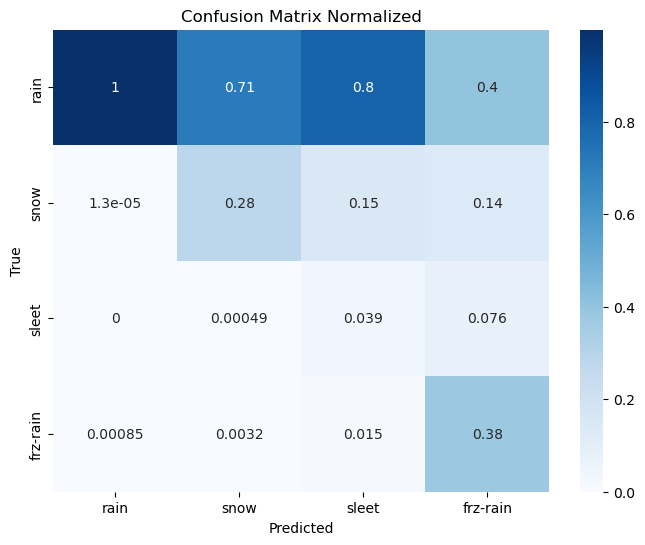

In [56]:
ConfusionMatrixDisplay(cm)
type_ = " Normalized"

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix{type_}')
plt.show()

### Case Study 1: Kentucky 